<a href="https://colab.research.google.com/github/Lokuhu/112-2_2LNN/blob/main/%E5%9B%9BD56_HW4_EB_%E8%BD%89_r_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
# 試算表>檔案>共用>發布到網路 即可於colab中讀取
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQhbAejyGUXlZltX2nsbC4sTw890L6081piAP8ZDJVbufqZ9xm-S5P7gIrXnpgszm-U9SmEkBxJc5uF/pub?gid=1265524659&single=true&output=csv'
seed = pd.read_csv(url)

In [ ]:
seed['Type'] = seed['Type'].replace(1, 0.0)
seed['Type'] = seed['Type'].replace(2, 1.0)
seed['Type'] = seed['Type'].replace(3, 2.0)
seed

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [ ]:
# Split data
X = seed.drop('Type',axis=1)
y = seed['Type']

# Covert these to numpy arr
X = X.values
y = y.values

# 20%test, 80%training
X_train, X_test, y_train, y_test=train_test_split (X, y ,test_size = 0.2, random_state = 30)

# Covert X and y to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Model5

In [ ]:
#hidden nodes = 11, activation function = Tanh, Optimizer = SGD, learning epochs = 300, learning rate = 0.01, momentum = 0.9
class Model5(nn.Module):

    def __init__(self, in_features = 7, h1 = 11, out_features = 3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        # add batch normalization
        self.bn1 = nn.BatchNorm1d(h1)
        self.out = nn.Linear(h1, out_features)
        #=self.bn2 = nn.BatchNorm1d(out_features)


    def forward(self, x):
        x = torch.tanh(self.bn1(self.fc1(x)))  # Use tanh activation and BN
        x = self.out(x)

        return x

torch.manual_seed(41)
model5=Model5()
criterion = nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model5.parameters(),lr=0.01, momentum=0.9)

In [ ]:
model5

Model5(
  (fc1): Linear(in_features=7, out_features=11, bias=True)
  (bn1): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (out): Linear(in_features=11, out_features=3, bias=True)
)

In [ ]:
# train the model
losses = []
t = 0
while t < 50:
    # 前向傳播
    y_pred = model5(X_train)

    # 計算交叉熵損失
    loss = criterion(y_pred, y_train)

    # regularization
    l2_lambda = 0.001
    p = 7  # 輸入特徵數
    m = 11  # 隱藏層節點數
    regularization_term = (l2_lambda / (p + 1 + p * (m + 1))) * sum(p.pow(2.0).sum() for p in model5.parameters())

    # 總損失
    total_loss = loss + regularization_term

    # 保留損失
    losses.append(total_loss.item())

    # 每10個epoch輸出一次loss
    if t % 10 == 0:
        print(f'Epoch: {t} and loss: {total_loss.item()}')

    # 反向傳播和權重調整
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    t += 1

Epoch: 0 and loss: 1.0660765171051025
Epoch: 10 and loss: 0.6433271765708923
Epoch: 20 and loss: 0.3981833755970001
Epoch: 30 and loss: 0.3142736554145813
Epoch: 40 and loss: 0.2665213644504547


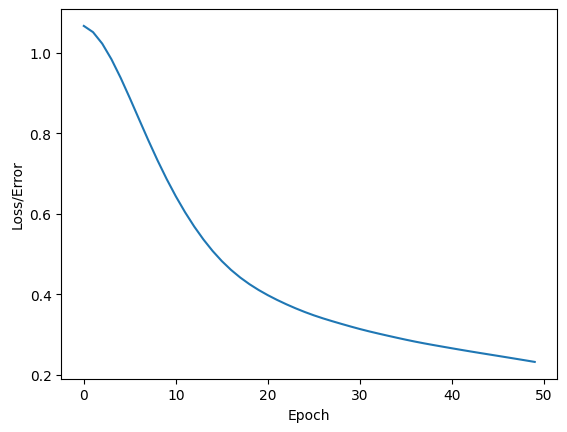

In [ ]:
# 畫圖
plt.plot(range(t), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
model5.eval()

Model5(
  (fc1): Linear(in_features=7, out_features=11, bias=True)
  (bn1): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (out): Linear(in_features=11, out_features=3, bias=True)
)

In [ ]:
# 評估模型
with torch.no_grad():
    y_eval = model5(X_test)
    test_loss = criterion(y_eval, y_test) + (l2_lambda / (p + 1 + p * (m + 1))) * sum(p.pow(2.0).sum() for p in model5.parameters())
    print(f'Test Loss: {test_loss.item()}')

correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model5(data.unsqueeze(0)) # add dimension of the batch

        print(f'{i+1}. {y_val} \t {y_test[i]} \t {y_val.argmax().item()}')

        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'We got {correct} correct!')
print(f'The accuracy is {correct/len(y_test)}')

Test Loss: 1.123637318611145
1. tensor([[-0.3892, -0.1638,  0.2824]]) 	 1 	 2
2. tensor([[-0.4015, -0.1240,  0.2827]]) 	 2 	 2
3. tensor([[-0.4069, -0.1068,  0.2686]]) 	 2 	 2
4. tensor([[-0.3804, -0.1974,  0.2776]]) 	 1 	 2
5. tensor([[-0.3914, -0.1605,  0.2469]]) 	 0 	 2
6. tensor([[-0.4028, -0.1200,  0.2718]]) 	 2 	 2
7. tensor([[-0.4009, -0.1272,  0.2497]]) 	 0 	 2
8. tensor([[-0.3939, -0.1494,  0.2593]]) 	 0 	 2
9. tensor([[-0.4075, -0.1043,  0.2761]]) 	 2 	 2
10. tensor([[-0.3853, -0.1754,  0.2925]]) 	 1 	 2
11. tensor([[-0.3927, -0.1559,  0.2439]]) 	 0 	 2
12. tensor([[-0.3813, -0.1925,  0.2859]]) 	 1 	 2
13. tensor([[-0.3876, -0.1688,  0.2878]]) 	 1 	 2
14. tensor([[-0.3864, -0.1741,  0.2746]]) 	 0 	 2
15. tensor([[-0.4105, -0.0960,  0.2577]]) 	 2 	 2
16. tensor([[-0.4006, -0.1282,  0.2492]]) 	 2 	 2
17. tensor([[-0.4043, -0.1149,  0.2632]]) 	 2 	 2
18. tensor([[-0.4056, -0.1110,  0.2927]]) 	 2 	 2
19. tensor([[-0.3944, -0.1477,  0.2605]]) 	 0 	 2
20. tensor([[-0.4047, -0.1135,